# 第三章 K近邻

# 距离的度量

设特征空间X是n维实数向量R$^{n}$ , $x_{i}$,$x_{j}$ $\in$ X 

$x_{i}$ = ($x_{i}^{(1)}$,$x_{i}^{(2)}$,...,$x_{i}^{(n)}$)$^{T}$

$x_{j}$ = ($x_{j}^{(1)}$,$x_{j}^{(2)}$,...,$x_{j}^{(n)}$)$^{T}$

$x_{i}$,$x_{j}$的$L_{p}$距离定义为：

$L_{p}$($x_{i}$,$x_{j}$)=$(\sum\limits_{l=1}^{n} \vert x_{i}^{(l)} - x_{j}^{(l)}\vert^{p})^{{\frac{1}{p}}}$

当 p = 1 时,称为曼哈顿距离，即
$L_{1}$($x_{i}$,$x_{j}$) = $\sum\limits_{l=1}^{n} \vert x_{i}^{(l)} - x_{j}^{(l)}\vert$


当 p = 2 时,称为欧氏距离，即
$L_{2}$($x_{i}$,$x_{j}$)=$(\sum\limits_{l=1}^{n} \vert x_{i}^{(l)} - x_{j}^{(l)}\vert^{2})^{{\frac{1}{2}}}$

当 p = $\infty$ 时，称为切比雪夫距离,它是各个坐标距离的最大值，

即$L_{\infty}$($x_{i}$,$x_{j}$) = $\max \limits_{l}\vert x_{i}^{(l)} - x_{j}^{(l)}\vert$

由此可见，不同的距离度量方式，一个点最近的相邻节点也是不同的！

In [1]:
import math
from itertools import combinations

In [2]:
# 默认采用最常用的欧氏距离
def L(x,y,p=2):
    if len(x)==len(y) and len(x)>=1:
        sum = 0
        for i in range(len(x)):
            sum += math.pow(abs(x[i]-y[i]),p)
        return math.pow(sum,1/p)
    else:
        return 0

# 方式1

基本暴力方式实现，遍历所有数据点，找出当前给定节点最邻近的K个节点，按照少数服从多数的原则确定当前点的类别

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter

In [4]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['label'] = iris.target
# 把列名重新改写下
df.columns = ['sepal length','sepal width','petal length','petal width','label']


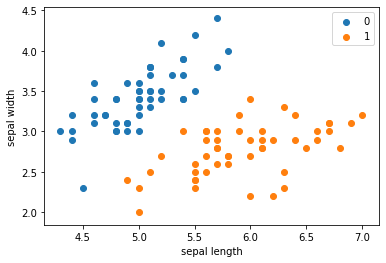

In [5]:
plt.scatter(df[:50]['sepal length'],df[:50]['sepal width'],label = '0')
plt.scatter(df[50:100]['sepal length'],df[50:100]['sepal width'],label = '1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [201]:
# 只取第一列，第二列2个feature进行研究，最后一列为实际标签
data = np.array(df.iloc[:100,[0,1,-1]])
X, y = data[:,:-1],data[:,-1]

In [211]:
class KNN:
    def __init__(self,X_train,y_train,n_neighbors = 3,p = 2):
        '''
        X_train : 训练集的feature
        y_train : 训练集的label
        n_neighbors : 邻近点的个数，即K的值
        p : 距离度量的方式，即Lp距离的p值，p=2时为欧式距离
        '''
        self.n = n_neighbors
        self.p = p
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self,X):
        '''
        np.linalg.norm
        linalg norm = linear(线性) + algebra(代数) + norm(范数)
        默认是求一个向量（矩阵）的二范数
        np.linalg.norm([3,4]) --->  sqrt(3*3+4*4) = 5.0
        
        list.index(max(list,key = lambda x:x[0]))
        labmda为匿名函数，入参为x，返回值为x[0]
        max(list,key=func) 中的key表示比较函数的规则，上面这个匿名函数表示以x[0]的大小作为比较规则取出列表中x[0]最大的那个元素
        list.index 为返回list里对应元素的索引值
        举例
        li = [[4,3],[2,5],[1,9]]
        max(li,key = lambda x:x[0]) --> 返回的是x[0]最大的列表元素 [4,3]
        li.index(max(li,key = lambda x:x[0])) --> 取出x[0]最大的列表元素的索引值，即0
        
        其中一种暴力的方式是直接统计出所有点到目标点的距离，排序取出前K个，在K个里统计出类别标签最多的那种作为目标点的label，但这样需要开辟与输入数据同等大小的空间来保存，太消耗资源
        下面采用第二种方式实现，只开辟K大小空间的列表用来存储最邻近的K个点，往后遍历时，取出每次遍历到的点的距离与当前K大小空间的列表里距离最大的那个进行比较，如果比距离最大的小，则替换掉
        如此循环往复直到遍历完
        '''
        
        #构建K个大小的列表用来存储最邻近的K个点
        # list里的每个元素是个二元组（距离，类别标签）
        knn_list = []
        for i in range(self.n):
            dist = np.linalg.norm(X-self.X_train[i],ord=self.p)
            knn_list.append([dist,self.y_train[i]])
        
        #这里的X_train为一个list列表对象，列表里的每个元素又是一个二元组的list,即类似[[1,2],[3,4]....[9,99]]
        for i in range(self.n,len(self.X_train)):
            #在K个大小的列表里找出距离最大的那个元素的下标索引值
            max_index = knn_list.index(max(knn_list,key = lambda x:x[0]))
            # 计算当前点与目标点的距离
            cur_dist = np.linalg.norm(X-self.X_train[i],ord=self.p)
            # 如果当前点的距离比K个大小里的列表中的最大距离还要小，就把最大的那个元素替换成当前点的距离和类别标签
            # 下标0表示取【距离，类别标签】里的距离这个值
            if cur_dist < knn_list[max_index][0]:
                knn_list[max_index] = [cur_dist,self.y_train[i]]
            
        # 统计K长度列表里哪种类别的标签数量最多，少数服从多数
        '''
        Counter 用来统计一个列表里每个值出现的次数
        举例
        li = [1,2,3,1,1,2,1]
        Counter(li)
        返回的是类似一个字典的对象，key为元素值，value为该值出现的次数 --> Counter({1: 4, 2: 2, 3: 1})
        most_common(k)函数获取出现次数最多的k个
        
        '''
        #取出所有的类别标签
        knn = [ k[-1] for k in knn_list]
        # count_paris 为count对象，类似一个字典，key为元素值，value为元素值出现的次数
        count_pairs = Counter(knn)
        # 找出出现次数最多的类别
        counter = Counter(count_pairs)
        # most_common(k) 返回value最大的k个（key,value）列表,取出列表里的第一个元素，是一个(key,value)的tuple，再取key
        predict_label = counter.most_common(1)[0][0]
        
        return predict_label
    
    def score(self,X_test,y_test):
        right_cnt = 0
        for X,y in zip(X_test,y_test):
            label = self.predict(X)
            if label == y:
                right_cnt += 1

        return right_cnt/len(X_test)
        
        

In [212]:
clf = KNN(X,y)

In [213]:
test_point = [5.0,2.7]
#预测出测试点的类别标签为1
print('Test Point: label = {}'.format(clf.predict(test_point)))

Test Point: label = 1.0


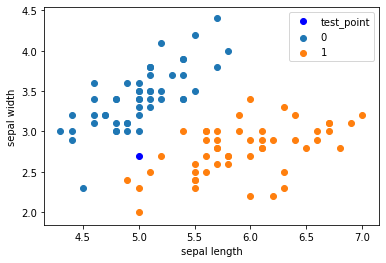

In [187]:
plt.scatter(df[:50]['sepal length'],df[:50]['sepal width'],label = '0')
plt.scatter(df[50:100]['sepal length'],df[50:100]['sepal width'],label = '1')
plt.plot(test_point[0],test_point[1],'bo',label = 'test_point')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

# 方式2：KD树


一篇讲得比较好的KD-tree算法的原理的博客 : https://leileiluoluo.com/posts/kdtree-algorithm-and-implementation.html

然后讲下自己对于KD-tree的简单理解：

首先得明白几件事：

1.kd树是一颗平衡二叉树，根节点表示划分的超平面，左子树表示超平面的左子空间，右子树表示超平面的右子空间

2.取中值的意义在于让这颗树达到平衡二叉树，就像对一维数组建立二叉排序树一样，左右子树均匀分布提高检索的效率，否则检索效率降低，查询速度慢

3.因为每个根节点表示以一个数据点按某个坐标轴进行划分的超平面，所以每个根节点必须是一个数据点，当点的个数为偶数时，不能采取数学意义上的中位数(两个数相加取平均的方式)，而是采取偏右位置的那个数据点（偏左位置也可以）

4.切分时按哪个维度进行切分有多种不同的操作，比如：

* 按每个维度依次切分，循环往复【下面代码是基于这个切分方式实现】

* 按方差最大的那个维度进行切分，因为这样最能把数据分开

5.建树是一个递归的过程，对应坐标值比切分坐标轴中位数小的数据点递归到左子树建树，对应坐标值比切分坐标轴中位数大的数据点递归到右子树建树

6.查找K个邻近点的过程是个深度优先搜索的过程（dfs），将目标点的坐标值与根节点的对应轴的坐标值进行比较，从而确定进入左子树还是右子树进行搜索，直至搜到叶子节点

这里有个问题很多博客上都没说清楚的一点是：如果仅仅是比较目标点与树上的节点划分维度坐标值相比较的话，不一定最终能走到叶子节点的！！！如果当前节点只有一个子节点的时候，不需要比较直接进入到那个子节点就行了
  
记录下此过程中搜索路径上的点与目标点的距离的最小值，利用优先队列维护K个点与目标点的最短距离

* 当优先队列未满时（未达到k个），此时另一兄弟子节点也需要进行搜索

* 当优先队列满时（达到k个），若以目标点为圆心，队列中最长的距离为半径的超球体与分割超平面相交时，才需要进入到另一兄弟子节点进行搜索

## 代码实现

### 如何维护K个距离最近的节点？

1.可以建个列表来存储，每次找到比该列表中最大距离要小的点时，用该点替换掉最大距离的点，但列表删除、插入、查找等时间复杂度较高

2.利用优先队列维护，以与目标点的距离作为优先队列里的排序规则，每次将优先队列里最大距离与当前找到的点与目标点的距离比较，决定是否进行入队出队的操作【下面代码是基于优先队列维护的】

python中的优先队列的使用：

有专门的优先队列库，但我觉得写这个库的作者...思想不够到位啊...

priority_queue.put():往优先队列中加入一个元素

priority_queue.get():从优先队列中获取最大优先级的一个元素，并且将它从优先队列中移出！

那么有没有只获取到优先队列里最大优先级元素值而不把它从队列中pop出来的方法呢？？？

答：没有！！！这也是我觉得python里优先队列这个库没其他语言优先队列库好用的原因....  



## 再来简单的谈下优先队列库使用中遇到的一些坑。。。

优先队列里中的元素需要比较大小才能确定优先级，比如float、int、string、list等类型都是可以比较大小的

当优先队列里的元素是一个tuple（元组）时，按tuple里的元素依次作为关键字进行比较，直至比较出结果

数字类型值越小，优先级越高，如果想要让值越大的优先级越高的话，可以加个负号，记得取出数据的时候要加个负号变回来

最大的一个坑：numpy 里的数组是不能比较大小的，但是list数组是可以比较大小的。。。当优先队列里的元素无法比较大小时就会报错。。。

比如：下面这个就会报错，因为numpy里的数组默认是不能比较大小的
```
from queue import PriorityQueue as PQueue
import numpy as np
pq = PQueue()
a = np.array([4.9,3.])
b = np.array([4.8,3.])
pq.put(a)
pq.put(b)
```

但是，list里的数组可以逐元素比较大小。。。下面这样就是正确的操作
```
from queue import PriorityQueue as PQueue
import numpy as np
pq = PQueue()
a = [4.9,3.]
b = [4.8,3.]
pq.put(a)
pq.put(b)
```

In [12]:
from queue import PriorityQueue as PQueue

In [ ]:
# 表示树上的每一个节点
class Node:
    def __init__(self,p,split,label):
        self.p = p #当前节点的值 point
        self.split = split #当前节点的划分维度 
        self.lnode = None # 当前节点的左子树（左子空间）
        self.rnode = None # 当前节点的右子树（右子空间）
        self.father = None # 当前节点的父节点，用来做回溯
        self.label = label # 当前节点的类别标签

# KD树！ K-dimension Tree
class KDTree:
    def __init__(self,data):
        # k表示一个数据有几个维度
        self.k = len(data[0])
    
    # data:构造kd树的数据
    # split：一开始的切分维度
    def build_tree(self,data,split):
        # 当前节点的数据为空
        if len(data)==0:
            return None
        #按split的维度排个序
        data = sorted(data,key = lambda x:x[split])
        # 取中位数，如果数据个数为偶数的话，取偏右的位置，此时中位数与数学意义上的中位数有点偏差
        median_index = len(data)//2
        # 构造根节点
        root = Node(data[median_index],split)
        # 记录根节点的划分维度
        root.split = split
        # 左子树的数据区间
        left_data = data[:median_index]
        # 右子树的数据区间
        right_data = data[median_index+1:]
        # 下次切分的维度
        next_split = (split + 1)%self.k
        # 递归构造左子树
        root.lnode = self.build_tree(left_data,next_split)
        # 标记左子树的父节点
        if root.lnode != None:
            root.lnode.father = root
        # 递归构造右子树
        root.rnode = self.build_tree(right_data,next_split)
        # 标记右子树的父节点
        if root.rnode != None:
            root.rnode.father = root
        self.root = root
        #返回根节点
        return root
    
    # 在kd树种查找K个最近距离的点，返回一个（distance,point）为每一个元素的优先队列
    def search(self,target,k = 1):
        # 优先队列维护最近的K个点，每个元素为 (距离，点)
        p_queue = PQueue()
        
        def travel(current):
            # 当前节点为空时为递归的终止条件
            if current == None:
                return 
            # 当前节点的切分维度
            split = current.split
            # 当前节点的数据 point
            cur_point = current.p
            # 选择更近的一个点，直到叶子节点为止！！！注意如果按左小右大的规则没有走到叶子节点的话，要继续往下走到叶子节点才行！！！
            # 先假设左子树小更接近
            near_point, far_point = current.lnode, current.rnode
            # 如果两颗子树都非空，则按左小右大的原则比较
            if current.lnode != None and current.rnode != None:
                if target[split] > cur_point[split]:
                    near_point, far_point = current.rnode, current.lnode
            # 如果左子树为空，右子树非空的话，说明右子树才是叶子节点，要继续走到叶子节点才行！！！
            if current.lnode == None and current.rnode != None:
                near_point, far_point = current.rnode, current.lnode
            # 递归往下找到当前最邻近的叶子节点，即 “当前最优”
            travel(near_point)
            # 计算“当前最优”点与目标点的距离向量
            dist_vec = [cur_point[i] - target[i] for i in range(len(target))]
            # 计算距离向量的二范式，也就是长度
            dist = np.linalg.norm(dist_vec)
            # 如果优先队列里的元素个数没到k个，就继续往里加，同时搜索较远的子树
            if p_queue.qsize() < k:
                # 优先队列里的dist加负号的原因是为了让距离最大的优先级最高，原因见上面所述
                p_queue.put((-dist, cur_point))
                travel(far_point)
            else:
                # 取出优先队列里距离最长的那个点
                max_dist, max_dist_point = p_queue.get()
                # 这里判断以目标点为圆心，K个邻近点里的当前最长距离为半径画超球体是否与切分的超平面相交
                # 最长距离要比对应轴的坐标差小，说明超球体与切分超平面不相交，不用去搜索另外一个兄弟节点，直接return掉
                if abs(cur_point[split] - target[split]) > (-max_dist):
                    p_queue.put((max_dist, max_dist_point))
                    return
                # 判断当前父节点到目标点的距离是否比K个里的最大距离更近
                if dist < (-max_dist): # 把更近的入优先队列
                    p_queue.put((-dist, cur_point))
                else:# 把原来取出来的放回去
                    p_queue.put((max_dist, max_dist_point))
                
                # 相交的情况，兄弟节点可能存在更近距离的点，同样方式递归遍历兄弟节点
                travel(far_point)

            return
        
        # 从根节点递归
        travel(self.root)
        # 返回K个最邻近的点的优先队列
        return p_queue
            
        
    # 先序遍历kd树
    def pre_order(self,node):
        if node == None:
            return 
        print(node.p)
        self.pre_order(node.lnode)
        self.pre_order(node.rnode)
        
    

In [119]:
# 书上的测试数据
data = [[2,3],[5,4],[9,6],[4,7],[8,1],[7,2]]
kdtree = KDTree(data)
root = kdtree.build_tree(data,0)
print("构造的KD树的先序遍历顺序:")
kdtree.pre_order(root)
k = 2
target = [5,5]
# 在KD树上k近邻搜索
print("目标点{p}的{k}个最近邻为:".format(p=target,k=k))
res = kdtree.search(target,k=k)

while not res.empty():
    item = res.get()
    print("距离:",-item[0],",点:",item[1])

构造的KD树的先序遍历顺序:
[7, 2]
[5, 4]
[2, 3]
[4, 7]
[9, 6]
[8, 1]
目标点[5, 5]的2个最近邻为:
距离: 2.23606797749979 ,点: [4, 7]
距离: 1.0 ,点: [5, 4]


![avatar](https://leileiluoluo.com/wp-content/uploads/2017/12/kd-tree-building.png)

与目标点[5.0, 2.7]最邻近的3个点为：
距离: 0.2999999999999998 ,点: [5.0, 3.0] ,标签类别: 0.0
距离: 0.22360679774997896 ,点: [5.1, 2.5] ,标签类别: 1.0
距离: 0.20000000000000018 ,点: [5.2, 2.7] ,标签类别: 1.0
预测[5.0, 2.7]的类别标签为:1.0


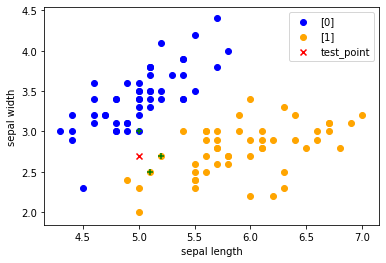

In [195]:
# 利用鸢尾花数据进行测试
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
# 转成numpy数组，方便切片操作
data = np.array(df.iloc[:100, [0, 1, -1]])
# label_dic 用来标记每个点的标签，key为点，value为标签，注意dic字典里的key必须是不可变对象，而list是可变的，tuple是不可变的
label_dic = {}
for item in data:
    label_dic[tuple(item[:-1])]=item[-1]


# 绘制训练集
def show_train():
    plt.scatter(data[:50,0], data[:50,1], c='blue', label='[0]')
    plt.scatter(data[50:100,0], data[50:100,1], c='orange', label='[1]')
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    
show_train()
# 这里就是特别坑的一点，因为numpy的数组不能比较大小，所以传进去建树的数据要是list！！！
kd_tree = KDTree(data[:,:-1].tolist())
root = kd_tree.build_tree(data[:,:-1].tolist(),0)
# 要求K近邻的目标点
test_point = [5.,2.7]
# 最邻近的点的个数
k = 3
print("与目标点{target}最邻近的{k}个点为：".format(target=test_point,k=k))
p_queue = kd_tree.search(test_point,k=k)
nearest_k = []
while not p_queue.empty():
    dis,point = p_queue.get()
    nearest_k.append((dis,point))

plt.scatter(test_point[0], test_point[1], c='red', marker='x',label="test_point")  # 测试点
# label_list 保存K个点的标签
label_list = []
for n in nearest_k:
    cur_label = label_dic.get(tuple(n[1]))
    label_list.append(cur_label)
    print("距离:",-n[0],",点:",n[1],",标签类别:",cur_label)
    plt.scatter(n[1][0], n[1][1], c='green', marker='+')  # k个最近邻点
# 绘图
plt.legend()

# 找出出现次数最多的类别
counter = Counter(label_list)
# most_common(k) 返回value最大的k个（key,value）列表,取出列表里的第一个元素，是一个(key,value)的tuple，再取key
predict_label = counter.most_common(1)[0][0]
print("预测{target}的类别标签为:{label}".format(target=test_point,label=predict_label))

与目标点[5.9, 3.5]最邻近的3个点为：
距离: 0.3605551275463989 ,点: [5.7, 3.8] ,类别标签: 0.0
距离: 0.2999999999999998 ,点: [5.9, 3.2] ,类别标签: 1.0
距离: 0.1414213562373093 ,点: [6.0, 3.4] ,类别标签: 1.0
预测[5.9, 3.5]的类别标签为:1.0


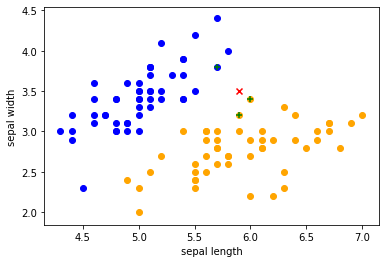

In [218]:
# 换个测试点
show_train()

# 要求K近邻的目标点
test_point = [5.9,3.5]
# 最邻近的点的个数
k = 3
print("与目标点{target}最邻近的{k}个点为：".format(target=test_point,k=k))
p_queue = kd_tree.search(test_point,k=k)
nearest_k = []
while not p_queue.empty():
    dis,point = p_queue.get()
    nearest_k.append((dis,point))

plt.scatter(test_point[0], test_point[1], c='red', marker='x')  # 测试点
# label_list 保存K个点的标签
label_list = []
for n in nearest_k:
    cur_label = label_dic.get(tuple(n[1]))
    label_list.append(cur_label)
    print("距离:",-n[0],",点:",n[1],",类别标签:",cur_label)
    plt.scatter(n[1][0], n[1][1], c='green', marker='+')  # k个最近邻点
    
# 找出出现次数最多的类别
counter = Counter(label_list)
# most_common(k) 返回value最大的k个（key,value）列表,取出列表里的第一个元素，是一个(key,value)的tuple，再取key
predict_label = counter.most_common(1)[0][0]
# Count 默认按value值降序排列
print("预测{target}的类别标签为:{label}".format(target=test_point,label=predict_label))